# Assignment Instructions:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set) or you can also run the below cell and load the data directly. 
2. Perform a similar anlaysis as done in the reference notebook on this dataset.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# we can read the data directly from raw github link
# we are also defining the name of the columns.
#make sure that your csv file and ipynb notebook are in the same folder. If they are in different folder then you have to define the complete path
df=pd.read_csv('haberman.csv',names=["age","operation_Year","axil_nodes","survival_status"],header = 0)
df.head()

,age,operation_Year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Attribute Information:

Age of patient at time of operation (numerical)
Year in which patient was undergone surgery (numerical)
Number of positive axillary or Lymph nodes detected (numerical) 
Survival status (class attribute) :
1 = the patient survived 5 years or longer
2 = the patient died within 5 year

### 1.1 Analyze high level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
- You have to write all of your observations in Markdown cell with proper formatting.You can go through the following blog to understand formatting in markdown cells - https://www.markdownguide.org/basic-syntax/
- Do not write your observations as comments in code cells.
- Write comments in your code cells in order to explain the code that you are writing. Proper use of commenting can make code maintenance much easier, as well as helping make finding bugs faster. 
- You can add extra cells using <b>Insert cell below command</b> in Insert tab. You can also use the shortcut Alt+Enter
- It is a good programming practise to define all the libraries that you would be using in a single cell

In [2]:
print(df.shape)

(306, 4)


Here shape gives No.of data points and features in  given data set.

No.of data points: 306
No.o Features: 4

In [3]:
print(df.columns)

Index(['age', 'operation_Year', 'axil_nodes', 'survival_status'], dtype='object')


We can even see the column names present in the given dataset from the above.
Coulmn names are: Age,Operation Year, Axil Nodes and Survival Status.

In [4]:
df["survival_status"].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

From above piece of code we can conclude that there are 225 patients or data points for class 1 out of 306 were survived more than 5 years and only 81 patients or data points for class 2 survived less than 5 years.

No.of Classes present in the data set are 2.

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              306 non-null    int64
 1   operation_Year   306 non-null    int64
 2   axil_nodes       306 non-null    int64
 3   survival_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


From the above code we can check out the number of columns and if there are columns with null values.In the given data sert there are no null values present for each column.


In [6]:
#Another way for checking null values present in the data 

df.isnull().sum()

age                0
operation_Year     0
axil_nodes         0
survival_status    0
dtype: int64

In [7]:
df.describe()

,age,operation_Year,axil_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


describe() function is very useful to get about basic statistical concepts like mean, median, mode, percentiles like 25% , 50% or 75%.

Age ranges from 30 to 83 years with mean of 52.45 and standard deviation of 10.80
axil_nodes ranges from 0 to 52 years with mean of 4.026 and standard deviation of 7.189

### 1.2 - Explain the objective of the problem.
(The objective for a problem can be defined as a brief explanation of problem that you are trying to solve using the given dataset)

Objective: I would like to apply various data analysis operation on the haberman dataset to get better insights, conclusions and how to conclude or predict survival status of patients who undergone from surgery.

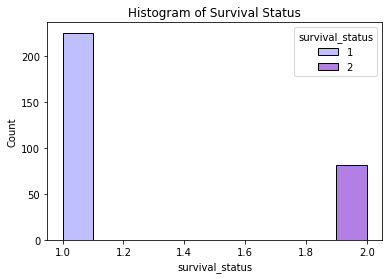

In [8]:
colors = ["#8080ff", "#6600cc"]

#Set your custom color palette
customPalette = sns.color_palette(colors)

sns.histplot(data=df, x="survival_status", hue = 'survival_status',palette = customPalette).set_title('Histogram of Survival Status')

plt.show()

Histograms represent the data distribution by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.Like from the hisplot we can observe count of data points of class 1 has more than 200 and for class 2 count of data points are between 60 to 100.

### 1.3 Perform Univariate analysis - Plot PDF, CDF, Boxplot, Voilin plots
- Plot the required charts to understand which feature are important for classification.
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each plot.

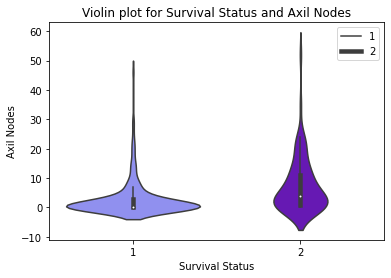

In [9]:
ax = sns.violinplot(data=df,x="survival_status", y="axil_nodes" ,palette = customPalette)
plt.legend(labels=["1","2"])
ax.set_title("Violin plot for Survival Status and Axil Nodes")
ax.set_ylabel("Axil Nodes")
ax.set_xlabel("Survival Status")
plt.show()

In above violin plot we observe that violin 1 has higher density for it is more near the 0 nodes and also it has whiskers in range 0-8 and in violin 2 it shows the lower density it has whiskers in range more from 0–15.

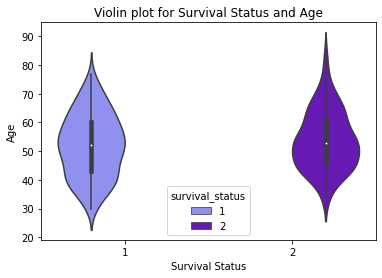

In [10]:
ax = sns.violinplot(data=df,x="survival_status", y="age",hue= "survival_status" , palette = customPalette)
ax.set_title("Violin plot for Survival Status and Age")
ax.set_ylabel("Age")
ax.set_xlabel("Survival Status")
plt.show()

From the above plot we can observe that violin 2 has higher density than violin 1. The patients at the age of 40-60 have the higher chance to survive less than 5 years.

Text(0.5, 1.0, 'Age distribution of a dataset based on Survival Status')

<Figure size 1008x1008 with 0 Axes>

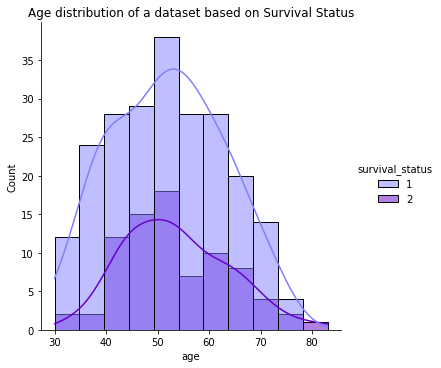

In [11]:
plt.figure(figsize =(14,14))

ax = sns.displot(data=df, x="age", kde=True, hue="survival_status",palette = customPalette)

plt.title("Age distribution of a dataset based on Survival Status")

From the above plot its hard to distinguish the two category of people on the bases of Age because people who survived more than 5 years and survived less than 5 years had Age ranging between 30 years and 85.

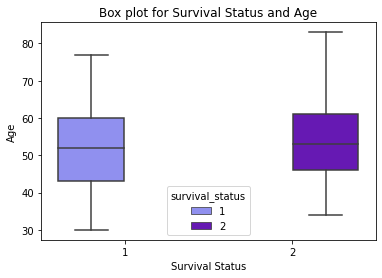

In [12]:
plt.figure(figsize =(6,4))
sns.boxplot(x = 'survival_status',y = 'age', data = df,hue="survival_status",palette = customPalette)

plt.title("Box plot for Survival Status and Age")
plt.ylabel("Age")
plt.xlabel("Survival Status")
plt.show()

There is a slight difference between the mean of people survived more than 5 and less than 5 years.

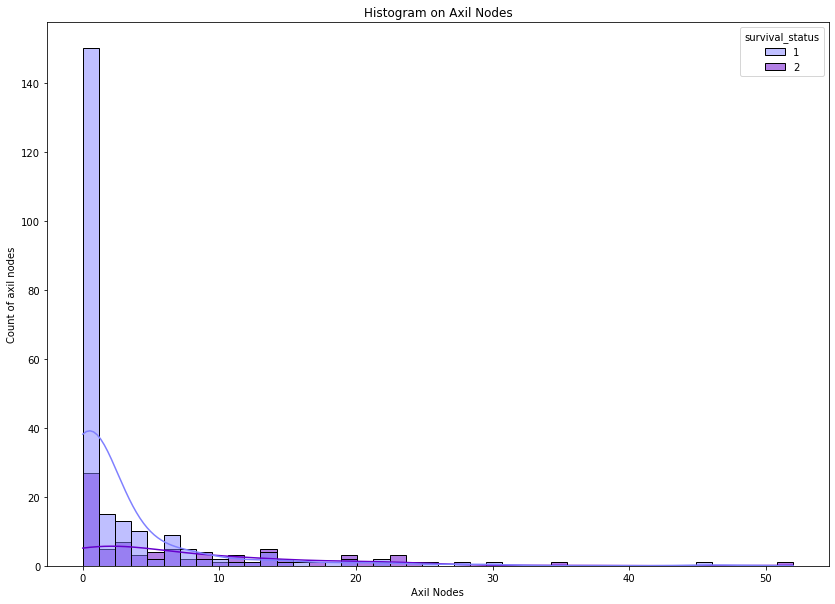

In [13]:
plt.figure(figsize =(14,10))
ax = sns.histplot(data=df, x="axil_nodes", kde=True, hue="survival_status",palette = customPalette)
ax.set_title("Histogram on Axil Nodes")
ax.set_ylabel("Count of axil nodes")
ax.set_xlabel("Axil Nodes")
plt.show()

It seems that people survive more if they have less axillary nodes detected and vice versa.

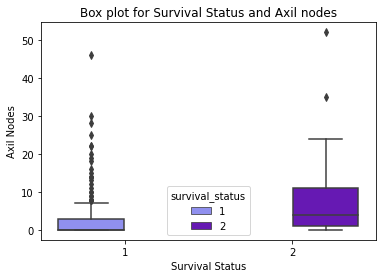

In [14]:
plt.figure(figsize =(6,4))
sns.boxplot(x = 'survival_status',y = 'axil_nodes', hue="survival_status", data = df,palette = customPalette)

plt.title("Box plot for Survival Status and Axil nodes")
plt.ylabel("Axil Nodes")
plt.xlabel("Survival Status")
plt.show()

It Seems that above box whiskers 25th percentile and 50th percentile are nearly same for survived more than 5 years and threshold for it is 0 to 5.



### 1.4 Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots
- Plot the required Scatter plots and Pair plots of different features to see which combination of features are useful for clasification task
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each  plot.


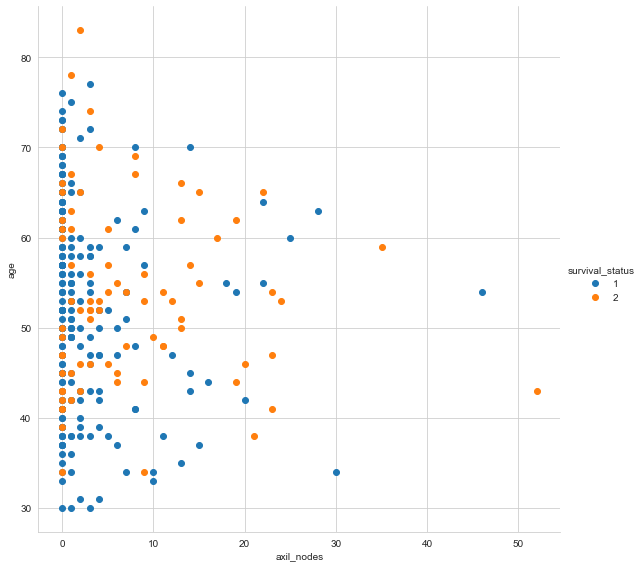

In [15]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="survival_status",height = 8).map(plt.scatter, "axil_nodes", "age").add_legend()
plt.show()

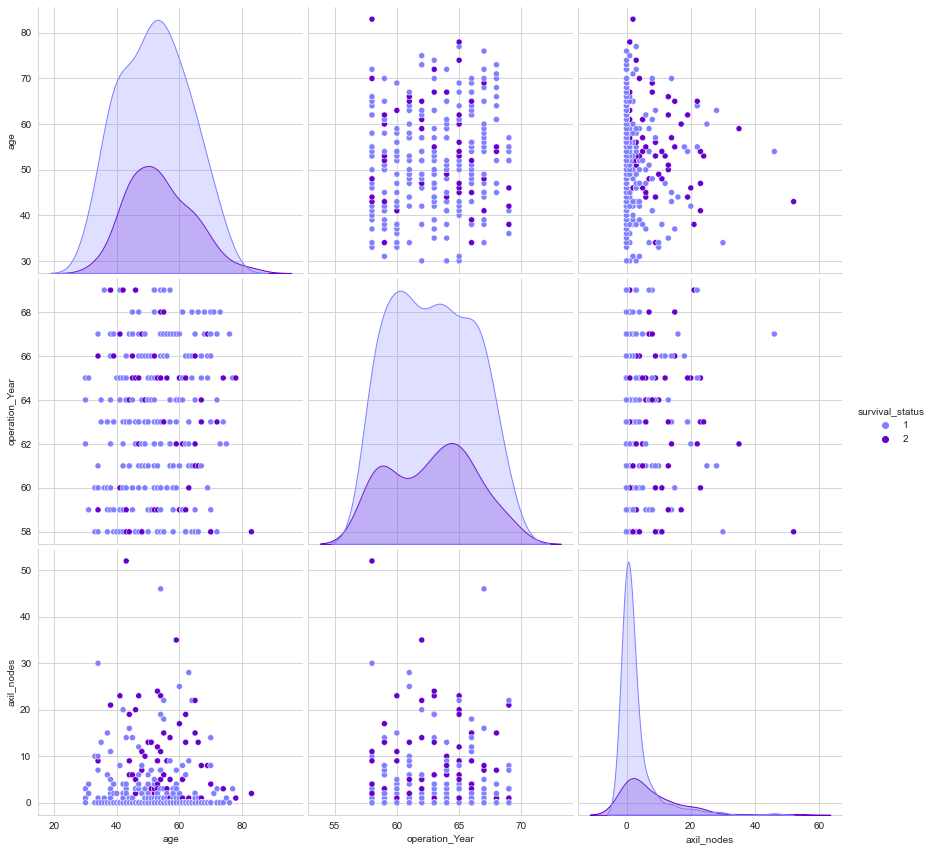

In [16]:
sns.set_style("whitegrid")
sns.pairplot(df, hue="survival_status", vars=["age","operation_Year", "axil_nodes"],palette = customPalette,height = 4)
plt.show()

### 1.5 Summarize your final conclusions of the Exploration
- You can desrcibe the key features that are important for the Classification task.
- Try to quantify your results i.e. while writing observations include numbers,percentages, fractions etc.
- Write a brief of your exploratory analysis in 3-5 points
- Write your observations in english as crisply and unambigously as possible.

Let's quantify the results with the help of CDF

In [17]:
survived_more = df[df['survival_status'] == 1]
survived_less= df[df['survival_status'] == 2]

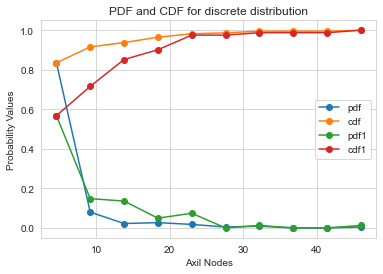

In [18]:
counts, bin_edges = np.histogram(survived_more['axil_nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)  
plt.plot(bin_edges[1:],pdf,marker="o",label = "pdf")
plt.plot(bin_edges[1:],cdf,marker="o",label = "cdf")

counts1, bin_edges1 = np.histogram(survived_less['axil_nodes'], bins=10, density = True)
pdf1 = counts1/(sum(counts1))
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges[1:],pdf1,marker="o",label ="pdf1")
plt.plot(bin_edges[1:],cdf1,marker="o",label ="cdf1")

plt.xlabel("Axil Nodes")
plt.ylabel("Probability Values")
plt.title("PDF and CDF for discrete distribution")
plt.legend()
plt.show()

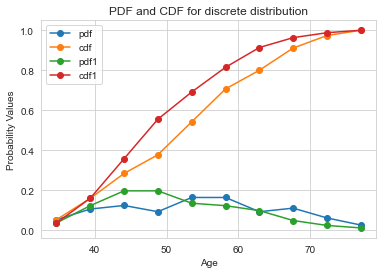

In [19]:
counts, bin_edges = np.histogram(survived_more['age'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)  
plt.plot(bin_edges[1:],pdf,marker="o",label = "pdf")
plt.plot(bin_edges[1:],cdf,marker="o",label = "cdf")

counts1, bin_edges1 = np.histogram(survived_less['age'], bins=10, density = True)
pdf1 = counts1/(sum(counts1))
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges[1:],pdf1,marker="o",label ="pdf1")
plt.plot(bin_edges[1:],cdf1,marker="o",label ="cdf1")

plt.xlabel("Age")
plt.ylabel("Probability Values")
plt.title("PDF and CDF for discrete distribution")
plt.legend()
plt.show()



Overall Conclusions:

From pair plots and scatter plots:

1.From the plot 3 we can conclude that younger people have higher percentage of survival.
Plot3 consisting of axil_nodes and Age is the only plot where the data points for survived_more and survived_less is more distinguishable as compared to other plots where the data points are overlapping.
So we consider age and axil nodes are the best features for further predictions.

From Histograms:

1.Data points for Survival more than 5 years has more than 200 and for survival less than 5 years has count of data points are between 60 to 100.

2.People survive more if they have less axillary nodes detected and vice versa

From Box plots and Violin plots:

1.The patients at the age of 40-60 have the higher chance to survive less than 5 years.

2.There are more outliers present in the dataset patients with axil nodes of survival greater than 5 years than survival less than 5 years. 

3.Patients with axil nodes has more than 8 have survived less than 5 years.

Final Observations:

1.Patients with lower nodes have higher percentage of survival rate.                                 
2.Younger people have more chances of surviving.                                                       
3.Around 82% of people who survived more than 5 years had axil_nodes less then or equal to 3.
4.Arround 58% of people who survived less than 5 years had axil nodes less then or equal to 3.
5.Around 5% of people who survived less than 5 years has age greater than 70.